In [14]:
from helper import plot_metrics, read_dict

env: (20x20, max_step=1000) all strategy

reward scelta best pov:
- 1 * visita cella con stima sbagliata osservata
- 8 * visita cella osservata dalla posizione migliore
- -2 se l'agente sta fermo 

reward massimizzazione IG:
- somma dell'IG di ogni cella attraversata

# Train data

In [15]:
train_data_entropy = read_dict(file_path=f"./data/entropy/train_data_entropy.json")
train_data_loss = read_dict(file_path=f"./data/loss/train_data_loss.json")
train_data_random = read_dict(file_path=f"./data/random/train_data_random.json")
train_data_ig_reward = read_dict(file_path=f"./data/ig_reward/train_data_ig_reward.json")

In [16]:
train_data_entropy.keys()

dict_keys(['episode_rewards', 'episode_cells_marker_pred_1', 'episode_cells_seen_pov', 'episode_steps'])

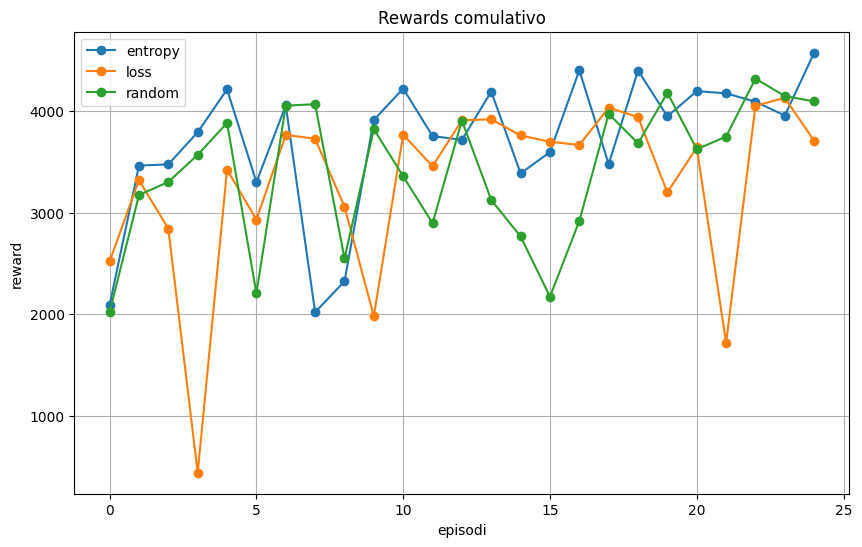

In [27]:
train_data = [train_data_entropy['episode_rewards'], train_data_loss['episode_rewards'], train_data_random['episode_rewards']]
# train_data = [train_data_ig_reward['episode_rewards']]

plot_metrics(train_data,
             title="Rewards comulativo",
             ylabel="reward",
             xlabel="episodi",
             legend_labels=["entropy", "loss", "random"])

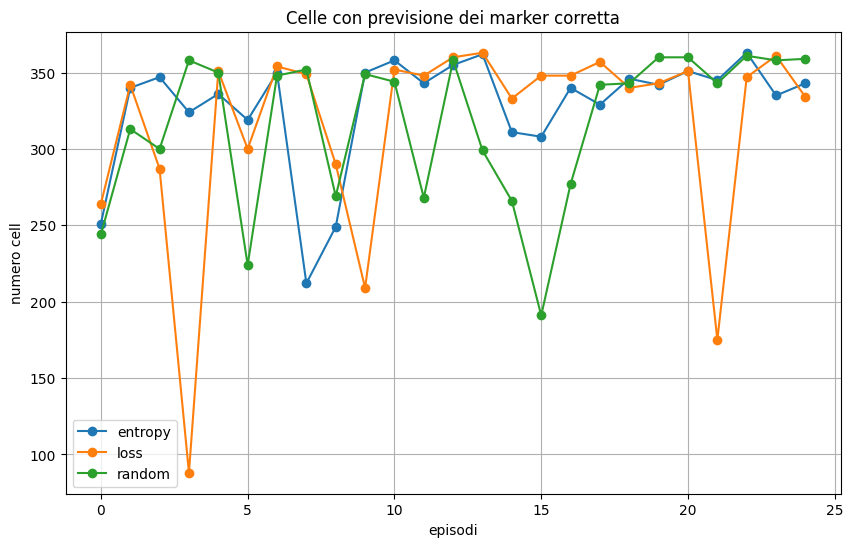

In [28]:
train_data = [train_data_entropy['episode_cells_marker_pred_1'], train_data_loss['episode_cells_marker_pred_1'], train_data_random['episode_cells_marker_pred_1']]
# train_data = [train_data_ig_reward['episode_cells_marker_pred_1']]

plot_metrics(train_data,
             title="Celle con previsione dei marker corretta",
             ylabel="numero cell",
             xlabel="episodi",
             legend_labels=["entropy", "loss", "random"])

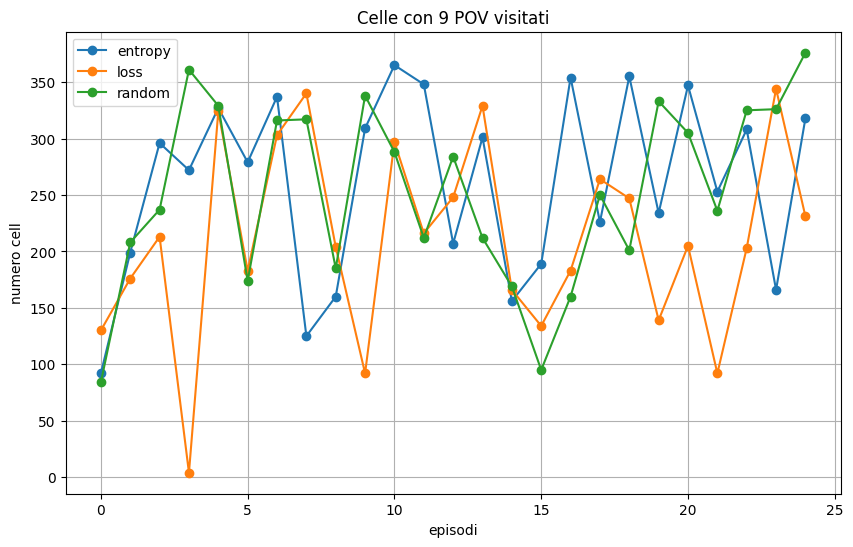

In [29]:
train_data = [train_data_entropy['episode_cells_seen_pov'], train_data_loss['episode_cells_seen_pov'], train_data_random['episode_cells_seen_pov']]
# train_data = [train_data_ig_reward['episode_cells_seen_pov']]

plot_metrics(train_data,
             title="Celle con 9 POV visitati",
             ylabel="numero cell",
             xlabel="episodi",
             legend_labels=["entropy", "loss", "random"])

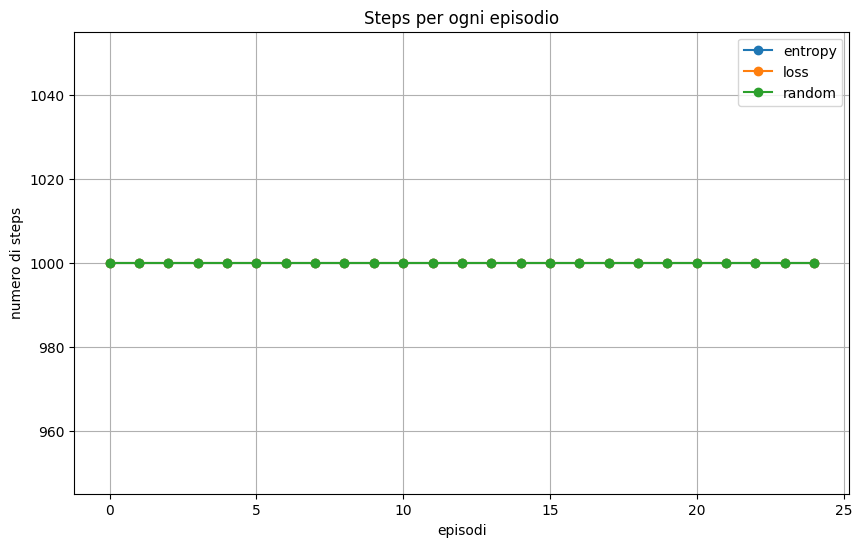

In [30]:
train_data = [train_data_entropy['episode_steps'], train_data_loss['episode_steps'], train_data_random['episode_steps']]
# train_data = [train_data_ig_reward['episode_steps']]
plot_metrics(train_data,
             title="Steps per ogni episodio",
             ylabel="numero di steps",
             xlabel="episodi",
             legend_labels=["entropy", "loss", "random"])

# Test data

In [21]:
test_data_entropy = read_dict(file_path=f"./data/entropy/test_data_entropy.json")
test_data_loss = read_dict(file_path=f"./data/loss/test_data_loss.json")
test_data_random = read_dict(file_path=f"./data/random/test_data_random.json")
test_data_ig_reward = read_dict(file_path=f"./data/ig_reward/test_data_ig_reward.json")
test_data_random_agent = read_dict(file_path=f"./data/random_agent/test_data_random_agent.json")

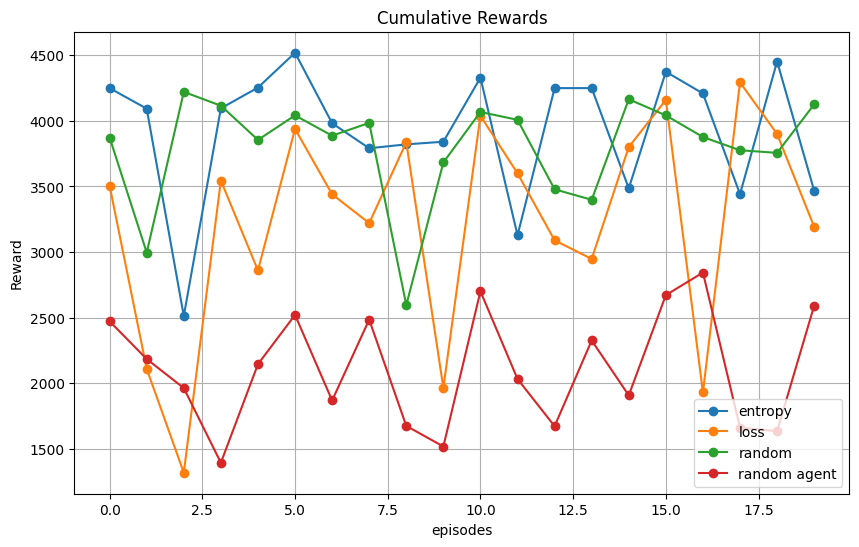

In [33]:
test_data = [test_data_entropy['cumulative_rewards_per_run'], test_data_loss['cumulative_rewards_per_run'], test_data_random['cumulative_rewards_per_run'], test_data_random_agent['cumulative_rewards_per_run']]
# test_data = [test_data_ig_reward['cumulative_rewards_per_run'], test_data_random_agent['cumulative_rewards_per_run']]
plot_metrics(test_data,
             title="Cumulative Rewards",
             ylabel="Reward",
             xlabel="episodes",
             legend_labels=["entropy", "loss", "random", "random agent"])

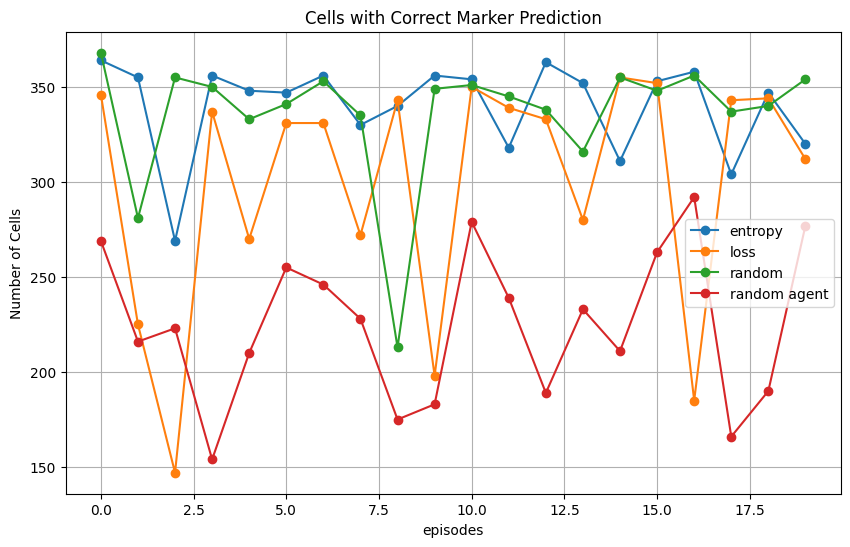

In [34]:
test_data = [test_data_entropy['cells_marker_pred_1_per_run'], test_data_loss['cells_marker_pred_1_per_run'], test_data_random['cells_marker_pred_1_per_run'], test_data_random_agent['cells_marker_pred_1_per_run']]
# test_data = [test_data_ig_reward['cells_marker_pred_1_per_run'], test_data_random_agent['cells_marker_pred_1_per_run']]
plot_metrics(test_data,
             title="Cells with Correct Marker Prediction",
             ylabel="Number of Cells",
             xlabel="episodes",
             legend_labels=["entropy", "loss", "random", "random agent"])

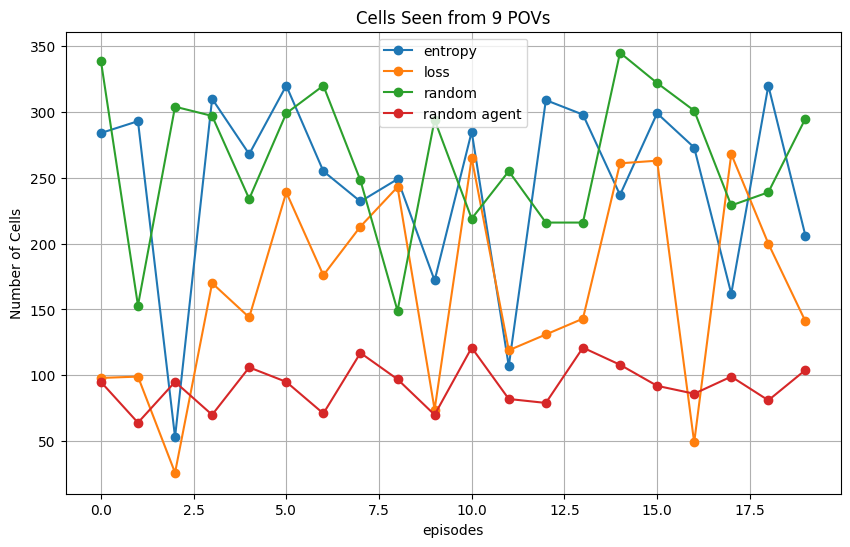

In [35]:
test_data = [test_data_entropy['cells_seen_pov_per_run'], test_data_loss['cells_seen_pov_per_run'], test_data_random['cells_seen_pov_per_run'], test_data_random_agent['cells_seen_pov_per_run']]
# test_data = [test_data_ig_reward['cells_seen_pov_per_run'], test_data_random_agent['cells_seen_pov_per_run']]

plot_metrics(test_data,
             title="Cells Seen from 9 POVs",
             ylabel="Number of Cells",
             xlabel="episodes",
             legend_labels=["entropy", "loss", "random", "random agent"])

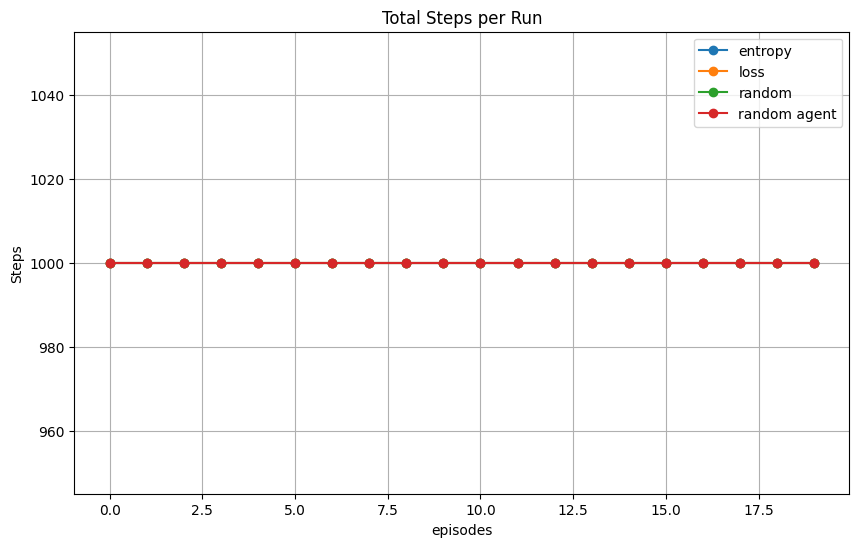

In [36]:
test_data = [test_data_entropy['total_steps_per_run'], test_data_loss['total_steps_per_run'], test_data_random['total_steps_per_run'], test_data_random_agent['total_steps_per_run']]
# test_data = [test_data_ig_reward['total_steps_per_run'], test_data_random_agent['total_steps_per_run']]

plot_metrics(test_data,
             title="Total Steps per Run",
             ylabel="Steps",
             xlabel="episodes",
             legend_labels=["entropy", "loss", "random", "random agent"])

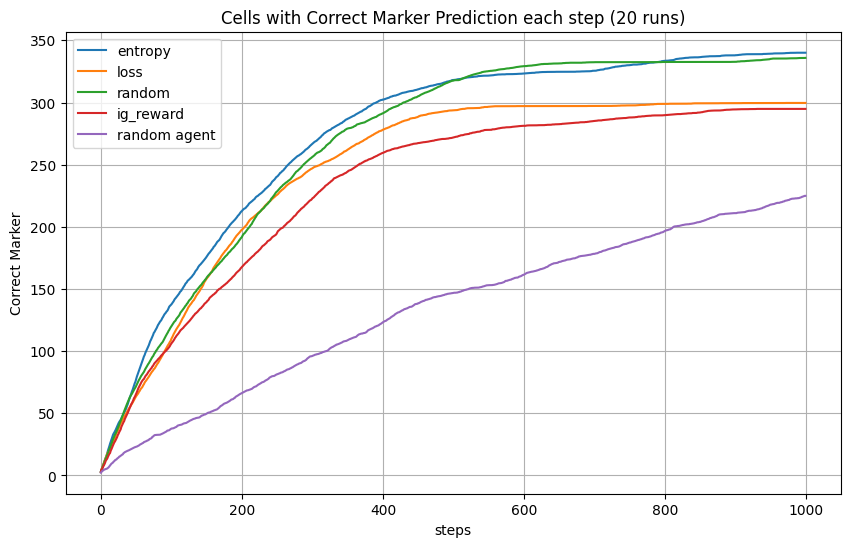

In [38]:
test_data = [test_data_entropy['cells_marker_pred_1_mean'], test_data_loss['cells_marker_pred_1_mean'], test_data_random['cells_marker_pred_1_mean'], test_data_ig_reward['cells_marker_pred_1_mean'], test_data_random_agent['cells_marker_pred_1_mean']]
# test_data = [test_data_ig_reward['cells_marker_pred_1_mean'], test_data_random_agent['cells_marker_pred_1_mean']]

plot_metrics(test_data,
                title="Cells with Correct Marker Prediction each step (20 runs)",
                ylabel="Correct Marker",
                xlabel="steps",
                legend_labels=["entropy", "loss", "random", "ig_reward", "random agent"], 
                marker=None)